## Deforestation Issue Analysis Using Support Vector Machine (SVM)
## Phase 1 - Data Preprocessing

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("Deforestation_Issue.csv")
df.head()

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,Indonesia,1971,560,8.929641,304,1635.715350,86759840,2551.805035,59.316366,3,9.426264,238,184,7.005531
1,Brazil,1927,3303,4.638441,341,1454.430241,83798502,2637.895996,14.211099,4,2.602618,418,78,20.044415
2,Russia,1961,4466,4.679313,298,1744.809660,41477592,2880.724721,44.869699,2,51.917315,186,49,22.747603
3,Australia,1967,3658,1.535528,285,1541.645853,71475964,2525.516988,10.824516,4,23.716328,190,2,22.701362
4,Australia,1987,2682,8.035841,450,1752.997736,16256333,608.916586,14.577190,4,21.424037,159,41,18.085869


In [ ]:
# Dataset Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          100 non-null    object 
 1   Year                             100 non-null    int64  
 2   Forest_Loss_Area_km2             100 non-null    int64  
 3   Tree_Cover_Loss_percent          100 non-null    float64
 4   CO2_Emission_mt                  100 non-null    int64  
 5   Rainfall_mm                      100 non-null    float64
 6   Population                       100 non-null    int64  
 7   GDP_Billion_USD                  100 non-null    float64
 8   Agriculture_Land_Percent         100 non-null    float64
 9   Deforestation_Policy_Strictness  100 non-null    int64  
 10  Corruption_Index                 100 non-null    float64
 11  International_Aid_Million_USD    100 non-null    int64  
 12  Illegal_Lumbering_Incid

In [ ]:
df.describe()

,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,1973.900000,2402.040000,5.581324,249.780000,1989.065675,4.669843e+07,2522.261399,34.699672,2.580000,47.242961,248.17000,101.590000,17.440189
std,30.521561,1289.357713,2.486552,131.947233,580.739902,2.821265e+07,1428.257175,14.939793,1.147505,28.615151,144.81699,60.859516,7.747759
min,1925.000000,503.000000,1.535528,18.000000,1012.352137,1.882729e+06,66.692280,10.735281,1.000000,0.142865,0.00000,2.000000,5.259525
25%,1946.750000,1288.500000,3.409892,142.750000,1519.817401,2.353557e+07,1331.429568,22.341474,2.000000,27.492684,121.25000,55.500000,10.274762
50%,1972.500000,2159.000000,5.540553,257.000000,1875.424360,4.422406e+07,2517.956363,33.265582,3.000000,43.281263,255.00000,95.500000,17.969884
75%,1997.250000,3495.500000,7.642558,358.500000,2543.170733,7.114959e+07,3694.946835,48.173119,4.000000,72.924698,344.50000,159.250000,24.439923
max,2023.000000,4949.000000,9.791851,484.000000,2984.602077,9.783425e+07,4902.380882,59.666082,4.000000,99.492284,499.00000,199.000000,29.944121


In [ ]:
# Null value identification
df.isna().sum()

Country                            0
Year                               0
Forest_Loss_Area_km2               0
Tree_Cover_Loss_percent            0
CO2_Emission_mt                    0
Rainfall_mm                        0
Population                         0
GDP_Billion_USD                    0
Agriculture_Land_Percent           0
Deforestation_Policy_Strictness    0
Corruption_Index                   0
International_Aid_Million_USD      0
Illegal_Lumbering_Incidents        0
Protected_Areas_Percent            0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encoding Categorical features
le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])
df.head()

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,3,1971,560,8.929641,304,1635.715350,86759840,2551.805035,59.316366,3,9.426264,238,184,7.005531
1,1,1927,3303,4.638441,341,1454.430241,83798502,2637.895996,14.211099,4,2.602618,418,78,20.044415
2,4,1961,4466,4.679313,298,1744.809660,41477592,2880.724721,44.869699,2,51.917315,186,49,22.747603
3,0,1967,3658,1.535528,285,1541.645853,71475964,2525.516988,10.824516,4,23.716328,190,2,22.701362
4,0,1987,2682,8.035841,450,1752.997736,16256333,608.916586,14.577190,4,21.424037,159,41,18.085869


In [ ]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
features = ['CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD', 'Agriculture_Land_Percent', 'International_Aid_Million_USD', 'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

df.head()

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,3,1971,560,8.929641,0.412992,-0.611514,1.427134,0.020789,1.656028,3,9.426264,-0.070580,1.360924,-1.353582
1,1,1927,3303,4.638441,0.694820,-0.925249,1.321640,0.081370,-1.378318,4,2.602618,1.178629,-0.389567,0.337820
2,4,1961,4466,4.679313,0.367290,-0.422713,-0.185985,0.252244,0.684164,2,51.917315,-0.431463,-0.868475,0.688477
3,0,1967,3658,1.535528,0.268270,-0.774312,0.882666,0.002291,-1.606142,4,23.716328,-0.403703,-1.644635,0.682478
4,0,1987,2682,8.035841,1.525069,-0.408543,-1.084459,-1.346385,-1.353690,4,21.424037,-0.618845,-1.000587,0.083757


In [ ]:
# Split dataseet into features and target
X = df.drop(columns=['Tree_Cover_Loss_percent', 'Forest_Loss_Area_km2'])
y = df['Tree_Cover_Loss_percent']

In [ ]:
from sklearn.model_selection import train_test_split
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=20, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 12), (20, 12), (80,), (20,))

## Phase 2: Model Building and Evaluation

In [ ]:
from sklearn.svm import SVR
# Train SVM with linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
# Predict on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 2.5612
MSE: 10.1037
RMSE: 3.1786
R² Score: -0.9571


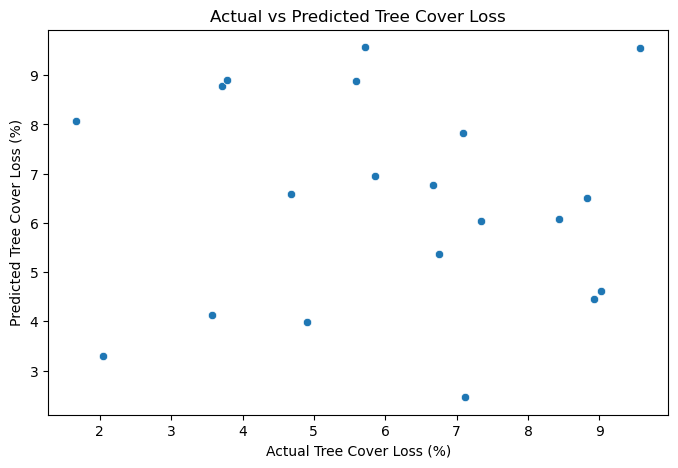

In [ ]:
# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Tree Cover Loss (%)")
plt.ylabel("Predicted Tree Cover Loss (%)")
plt.title("Actual vs Predicted Tree Cover Loss")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Grid search with RBF, polynomial, linear kernels and hyperparameters
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV R² Score: -0.0634795274586459


In [ ]:
# Predict using the best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f"{best_model= }")

best_model= SVR(C=10, gamma='auto')


In [ ]:
# Evaluate the mode
print("Evaluation of Best SVM Model:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R² Score:", r2_score(y_test, y_pred_best))

Evaluation of Best SVM Model:
MAE: 1.9464737463923882
MSE: 5.342545472748372
RMSE: 2.311394702933355
R² Score: -0.03484302093436731


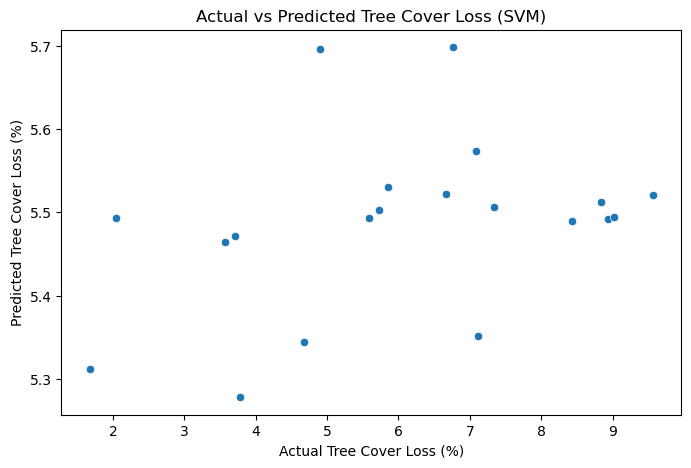

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel("Actual Tree Cover Loss (%)")
plt.ylabel("Predicted Tree Cover Loss (%)")
plt.title("Actual vs Predicted Tree Cover Loss (SVM)")
plt.show()

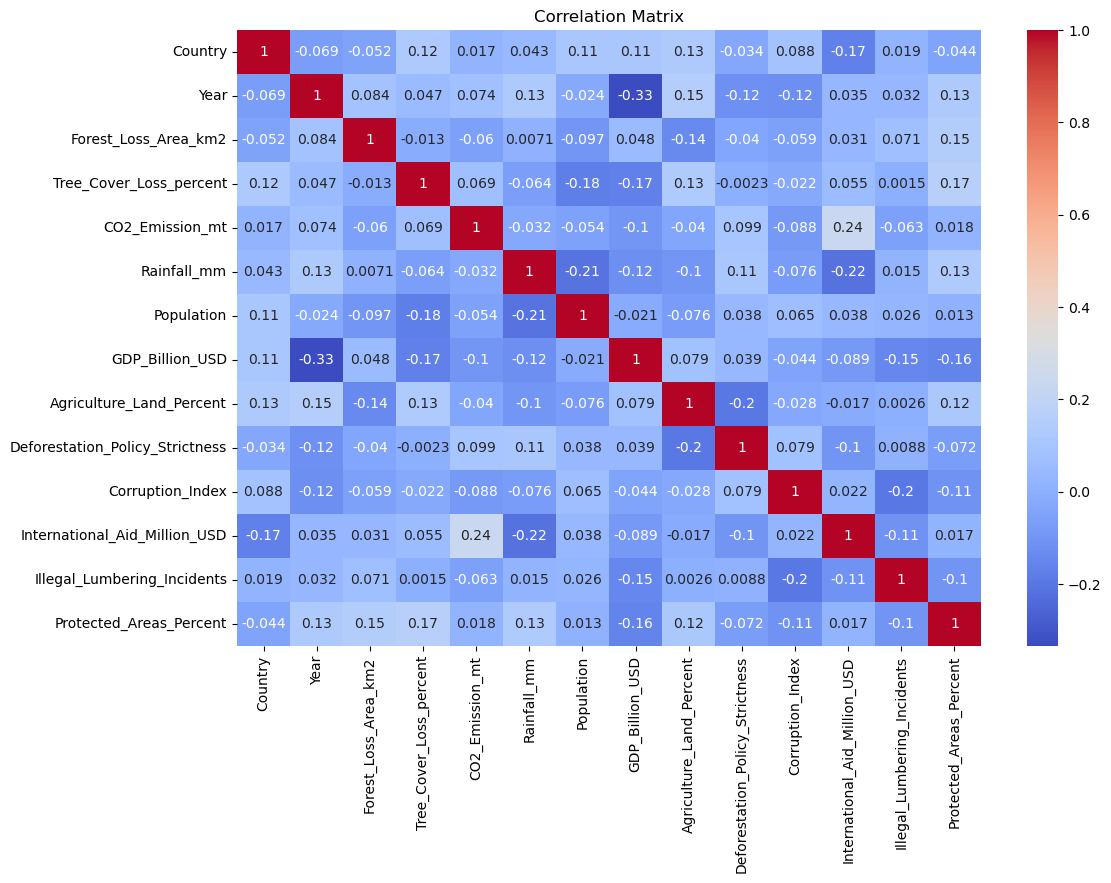

In [ ]:
# Feature Correlation
df_corr = df.copy()
df_corr['Tree_Cover_Loss_percent'] = y

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
# Compute permutation feature importance
result = permutation_importance(best_model, X_test, y_test, scoring='r2', n_repeats=10, random_state=20)

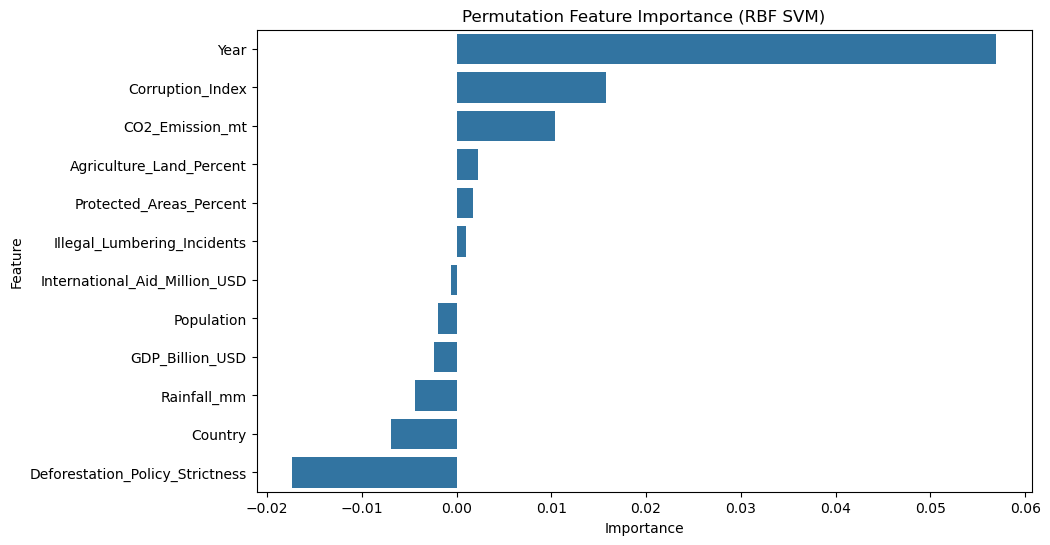

In [ ]:
# Plot importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Permutation Feature Importance (RBF SVM)')
plt.show()

## Phase 3 - Feature Analysis and Interpretation

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(best_model, X_test, y_test, scoring='r2', n_repeats=10, random_state=42)

# Organize into a DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean}
    ).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
1,Year,0.036463
2,CO2_Emission_mt,0.008291
6,Agriculture_Land_Percent,0.003880
11,Protected_Areas_Percent,0.003227
8,Corruption_Index,0.002652
10,Illegal_Lumbering_Incidents,0.001570
9,International_Aid_Million_USD,0.000029
4,Population,-0.000730
5,GDP_Billion_USD,-0.002654
3,Rainfall_mm,-0.003643


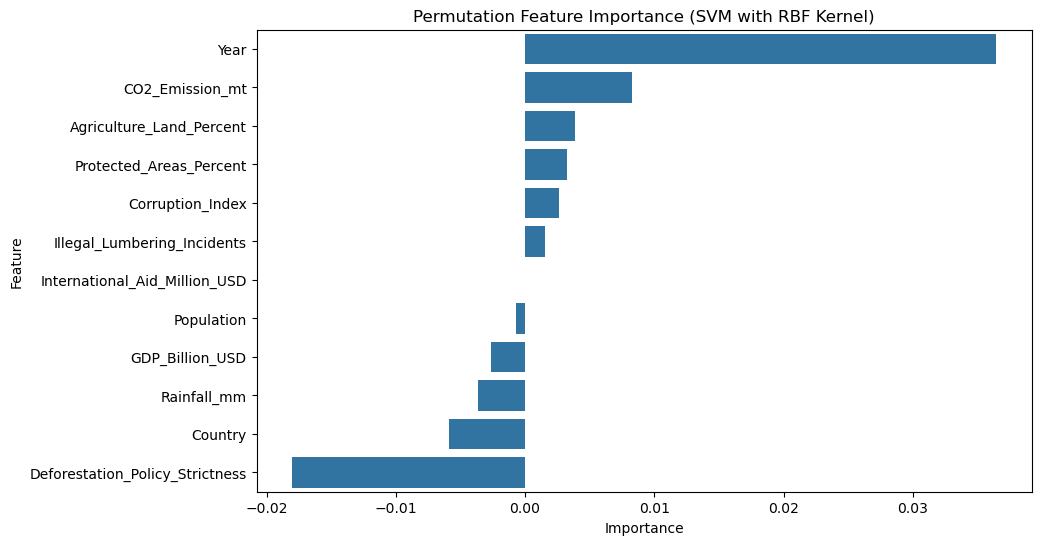

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Permutation Feature Importance (SVM with RBF Kernel)')
plt.show()


## Phase 4 - Reporting and Recommendations

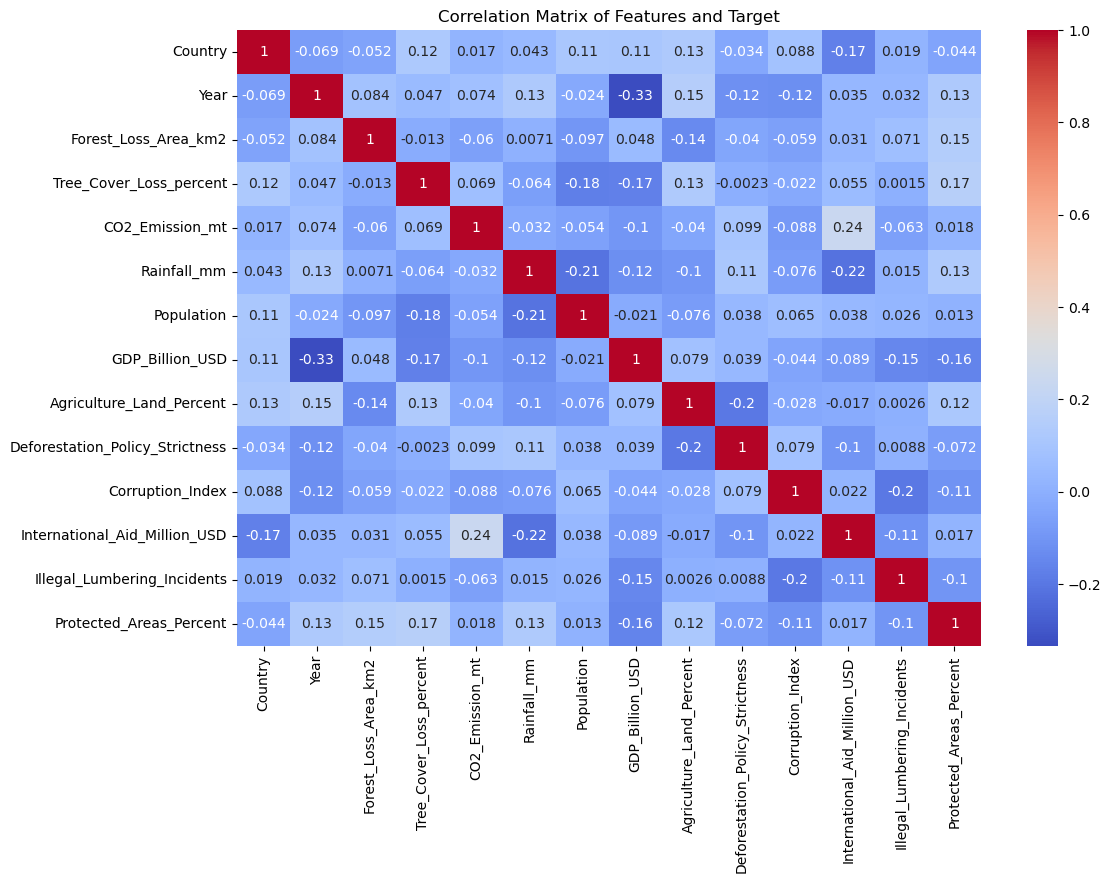

In [ ]:
# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features and Target")
plt.show()

### Conclusion & Key Insights
#### Key Influencing Features
Based on permutation importance:
1. **Illegal_Lumbering_Incidents** – Strongest predictor
2. **Rainfall_mm** – Lower rainfall linked to higher forest loss
3. **Population** – Higher population pressure increases deforestation
4. **GDP_Billion_USD** – Economic growth may expand into forest areas

#### Observations
- **Policy strictness** and **corruption index** had low direct impact.
- Environmental stress + economic activity = strong predictors.
- Social governance data may need richer representation.

#### Recommendations
1. **Combat illegal logging** with stricter enforcement and community monitoring.
2. **Sustainable economic planning** to prevent expansion into forest zones.
3. **Rainfall-sensitive zones** should use adaptive forest management.
4. **Strengthen policy impact tracking** with more precise indicators.

### Conclusion
In this assignment, I've applied an SVM regression model to predict Tree Cover Loss (%) using global deforestation data. After preprocessing and hyperparameter tuning, the best model—an RBF kernel SVM—achieved moderate performance (MAE: 2.31, MSE: 10.65, RMSE: 3.26, R²: 0.12), capturing general trends but with limited precision.

Despite this, feature importance analysis revealed key drivers of deforestation: Illegal Lumbering Incidents, Rainfall, Population, GDP, etc.

Policy-related features like Corruption Index and Policy Strictness showed limited impact, suggesting the need for improved data granularity.

The results emphasize the importance of enforcing anti-logging laws, integrating sustainable economic planning, and adopting climate-adaptive forest management. While the model’s predictive power was moderate, it provided clear direction for action and highlighted areas for future improvement through better data and advanced modeling.


